Machine Learning course final project\
Student name: Chanjong Kim\
Email: H19chaki@du.se

This note contains preliminary data processing, and EDA.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import math
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

# Preprocesssing

In [3]:
# data import
df = pd.read_csv('C:/Users/mindt/OneDrive/Sweden/Study/DU/Business Intelligence/Machine learning/proejct/data and codes/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df = df.rename(columns={'arrival_date_year':'year', 
                        'arrival_date_month':'month',
                       'arrival_date_week_number':'week',
                       'arrival_date_day_of_month':'day'})

In [5]:
df.head()

,hotel,is_canceled,lead_time,year,month,week,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(119390, 32)

In [7]:
df.info()
#df.decribe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   year                            119390 non-null  int64  
 4   month                           119390 non-null  object 
 5   week                            119390 non-null  int64  
 6   day                             119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##### missing values

In [8]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [9]:
df['country'].fillna('Unknown', inplace=True)
df['company'].fillna('Private', inplace=True)
df['agent'].fillna('Private', inplace=True)
df['children'].fillna(0,inplace=True)

In [10]:
df.isnull().values.any()

False

Dataset contains two different hotels: city and resort

In [13]:
# all reservation
city = df[(df['hotel']=='City Hotel')]
resort = df[(df['hotel']=='Resort Hotel')]

# active reservation
city_act = df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]
resort_act = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]

# cancelled reservation
city_can = df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)]
resort_can = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)]

In [14]:
# Total active reservation only
act = df[(df['is_canceled']==0)]
can = df[(df['is_canceled']==1)]

# EDA

In [15]:
act.head()

,hotel,is_canceled,lead_time,year,month,week,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,Private,Private,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,Private,Private,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,Private,Private,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,Private,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,Private,0,Transient,98.0,0,1,Check-Out,2015-07-03


Reservation records: by hotel type

In [16]:
act['hotel'].value_counts()

City Hotel      46228
Resort Hotel    28938
Name: hotel, dtype: int64

In [17]:
act['hotel'].value_counts()/len(act)*100

City Hotel      61.501211
Resort Hotel    38.498789
Name: hotel, dtype: float64

Text(0.5, 1.0, 'Hotel Type')

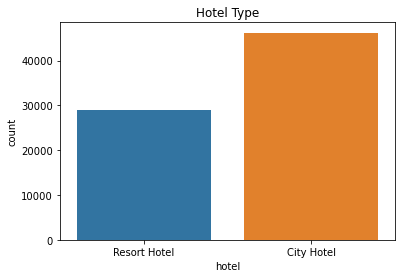

In [18]:
sns.countplot(data=act, x='hotel')
plt.title('Hotel Type')

reservation records: by year & by hotel type

In [19]:
act.groupby(['hotel','year'])['is_canceled'].count()

hotel         year
City Hotel    2015     7678
              2016    22733
              2017    15817
Resort Hotel  2015     6176
              2016    13637
              2017     9125
Name: is_canceled, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

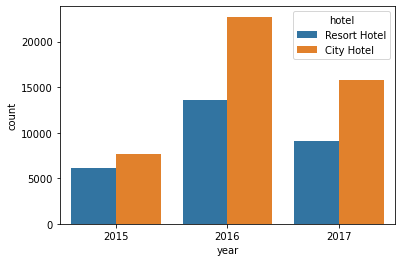

In [20]:
sns.countplot(data=act,x='year',hue='hotel')

reservation records: by month & by hotel type

In [21]:
act.groupby(['hotel','month'])['is_canceled'].count()

hotel         month    
City Hotel    April        4015
              August       5381
              December     2392
              February     3064
              January      2254
              July         4782
              June         4366
              March        4072
              May          4579
              November     2696
              October      4337
              September    4290
Resort Hotel  April        2550
              August       3257
              December     2017
              February     2308
              January      1868
              July         3137
              June         2038
              March        2573
              May          2535
              November     1976
              October      2577
              September    2102
Name: is_canceled, dtype: int64

In [40]:
act_16 = act[(act['year']==2016)]

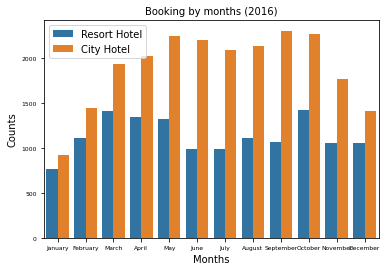

In [48]:
sort = Sort_Dataframeby_Month(df=act_16,monthcolumnname='month')
a = sns.countplot(data=sort,x='month',hue='hotel')
a.axes.set_title('Booking by months (2016)', fontsize=10)
a.tick_params(labelsize=6)
a.set_ylabel('Counts',fontsize=10)
a.set_xlabel('Months',fontsize=10)
#a.legend(fontsize='x-large',title_fontsize='10')
a.legend()

plt.savefig("booking_by_months.png")

reservation records: by week & by hotel type

In [20]:
act.groupby(['hotel','week'])['is_canceled'].count()

hotel         week
City Hotel    1       440
              2       448
              3       488
              4       527
              5       527
                     ... 
Resort Hotel  49      515
              50      368
              51      357
              52      429
              53      480
Name: is_canceled, Length: 106, dtype: int64

<AxesSubplot:xlabel='week', ylabel='count'>

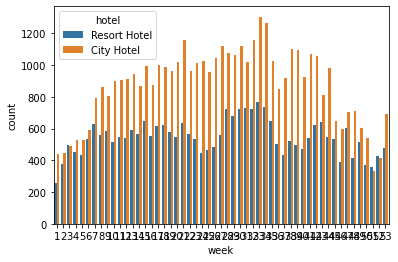

In [21]:
sns.countplot(data=act,x='week',hue='hotel')

In [22]:
# distribution channel
act['distribution_channel'].value_counts()/len(act)

TA/TO        0.767874
Direct       0.160817
Corporate    0.069220
GDS          0.002075
Undefined    0.000013
Name: distribution_channel, dtype: float64

# data prep for prediction works

In [23]:
# changing month string to number
def months(x):
    if x == 'January':
        x=1
    elif x=='february':
        x=2
    elif x=='March':
        x=3
    elif x=='April':
        x=4
    elif x=='May':
        x=5
    elif x=='June':
        x=6
    elif x=='July':
        x=7
    elif x=='August':
        x=8
    elif x=='September':
        x=9
    elif x=='October':
        x=10
    elif x=='November':
        x=11
    elif x=='December':
        x=12
    return x

can['month_num']=can['month'].apply(lambda x:months(x))
act['month_num']=act['month'].apply(lambda x:months(x))
can.head()

C:\Users\mindt\AppData\Local\Temp/ipykernel_19980/4062070225.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mindt\AppData\Local\Temp/ipykernel_19980/4062070225.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,year,month,week,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_num
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,240.0,Private,0,Transient,82.0,0,1,Canceled,2015-05-06,7
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,15.0,Private,0,Transient,105.5,0,0,Canceled,2015-04-22,7
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,240.0,Private,0,Transient,123.0,0,0,Canceled,2015-06-23,7
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,240.0,Private,0,Transient,107.0,0,2,Canceled,2015-05-11,7
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,Private,Private,0,Transient,108.3,0,2,Canceled,2015-05-29,7


In [24]:
# create 'date' column
act['date'] = act['year'].astype('str')+'/'+\
act['month_num'].astype('str')+'/'+\
act['day'].astype('str')

act['date'] = pd.to_datetime(act['date'])

act.head()

C:\Users\mindt\AppData\Local\Temp/ipykernel_19980/757598325.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mindt\AppData\Local\Temp/ipykernel_19980/757598325.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,year,month,week,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_num,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Private,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Private,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Private,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Private,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Private,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01


creating dataframe counting reservation numbers

date scale

In [25]:
# city hotel reservation count
city = pd.DataFrame(act[(act['hotel']=='City Hotel')].\
                    groupby(["date"])['date'].count())
city = city.rename(columns={'date':'city hotel'})
city = city.reset_index()

# resort hotel reservation count
resort = pd.DataFrame(act[(act['hotel']=='Resort Hotel')].\
                    groupby(["date"])['date'].count())
resort = resort.rename(columns={'date':'resort hotel'})
resort = resort.reset_index()

# merge
bookings = pd.merge(city,resort, on=['date'])
bookings

,date,city hotel,resort hotel
0,2015-07-01,65,38
1,2015-07-02,1,35
2,2015-07-03,10,27
3,2015-07-04,9,36
4,2015-07-06,1,40
...,...,...,...
783,2017-08-27,79,46
784,2017-08-28,106,41
785,2017-08-29,60,21
786,2017-08-30,34,28


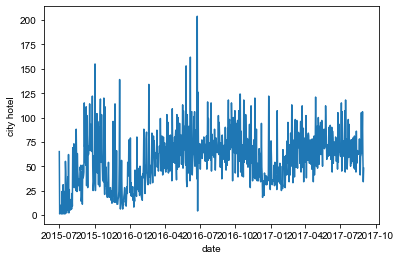

In [26]:
# booking trend: city hotel
sns.lineplot(data=city,
            x='date',
            y='city hotel')
sns.set(rc={'figure.figsize':(30,15)})

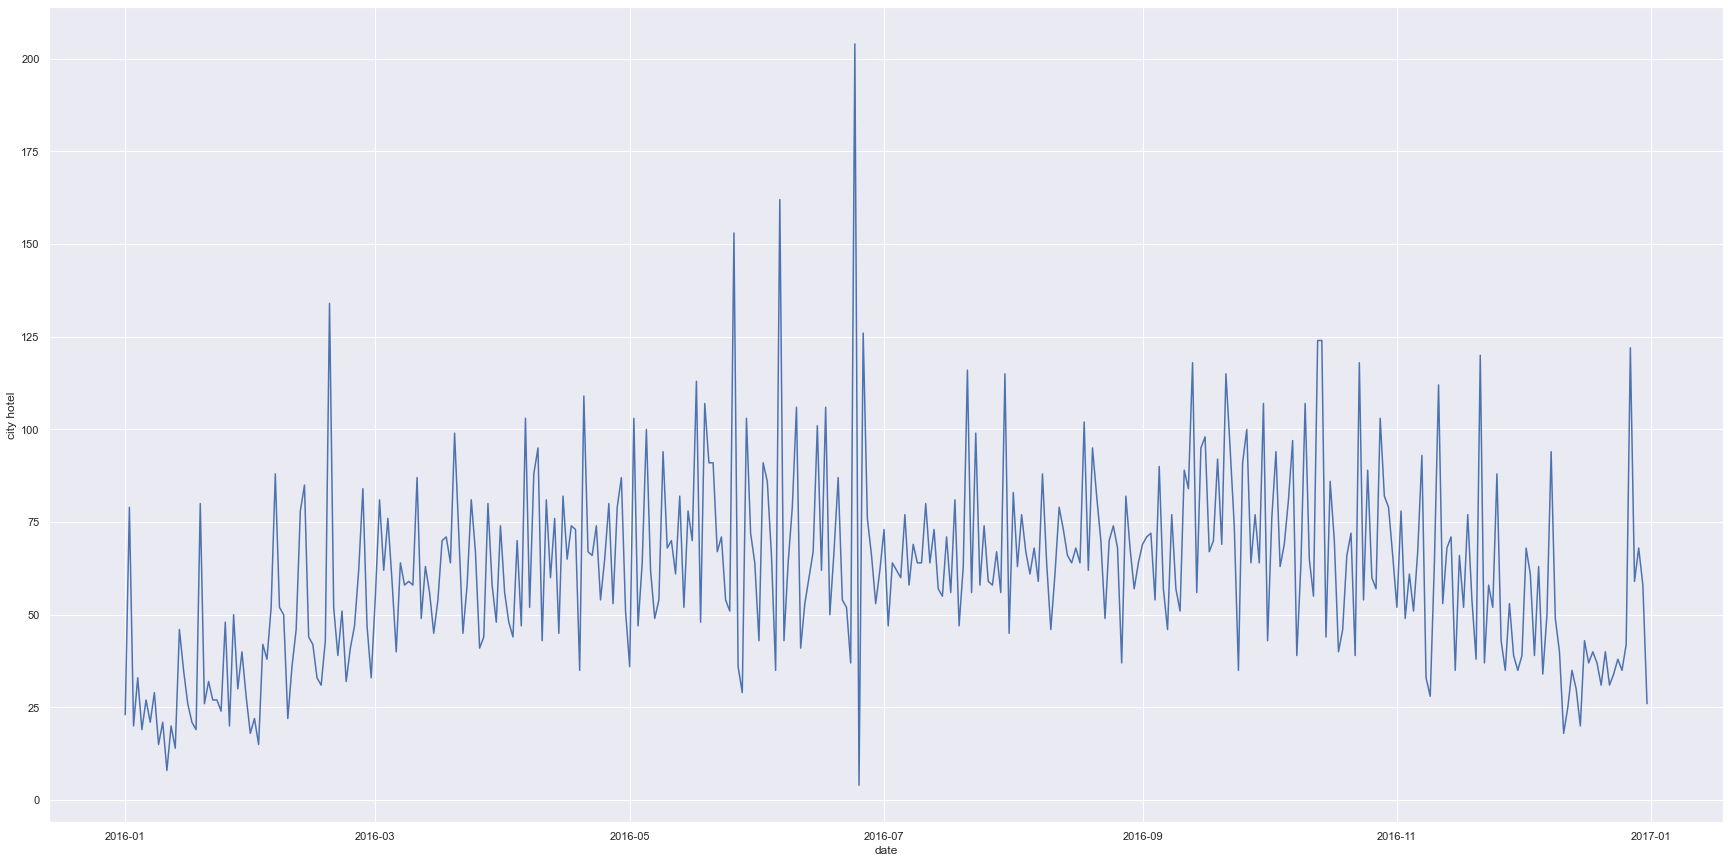

In [27]:
# city hotel: 2016 only
city_2016 = city[(city['date'] >= '2016-01-01') &
                (city['date'] <= '2016-12-31')]
sns.lineplot(data=city_2016,
            x='date',
            y='city hotel')
sns.set(rc={'figure.figsize':(25,15)})

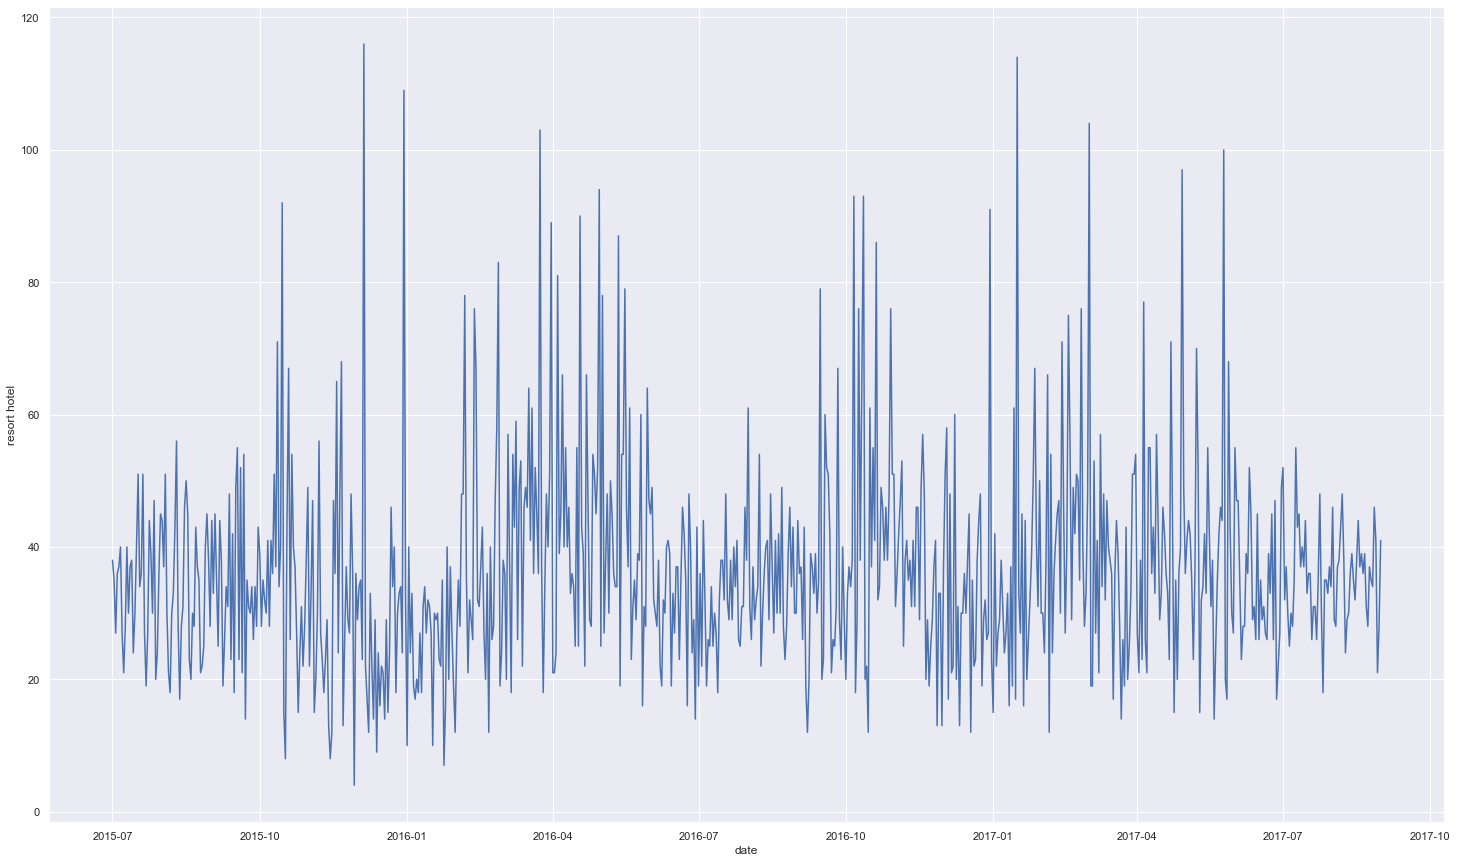

In [28]:
# booking trend: city hotel
sns.lineplot(data=resort,
            x='date',
            y='resort hotel')
sns.set(rc={'figure.figsize':(25,15)})

week scale

In [29]:
# create 'date_week' column
act['date_week'] = act['year'].astype('str')+'-'+act['week'].astype('str')

act['date'] = pd.to_datetime(act['date'])

act.head()

C:\Users\mindt\AppData\Local\Temp/ipykernel_19980/3828232718.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mindt\AppData\Local\Temp/ipykernel_19980/3828232718.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,year,month,week,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_num,date,date_week
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,2015-27
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,2015-27
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,2015-27
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,2015-27
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,2015-27


In [30]:
# city hotel reservation count
city2 = pd.DataFrame(act[(act['hotel']=='City Hotel')].\
                    groupby(["date_week"])['date_week'].count())
city2 = city2.rename(columns={'date_week':'city hotel'})
city2 = city2.reset_index()

# resort hotel reservation count
resort2 = pd.DataFrame(act[(act['hotel']=='Resort Hotel')].\
                    groupby(["date_week"])['date_week'].count())
resort2 = resort2.rename(columns={'date_week':'resort hotel'})
resort2 = resort2.reset_index()

# merge
bookings2 = pd.merge(city2,resort2, on=['date_week'])
bookings2

,date_week,city hotel,resort hotel
0,2015-27,85,136
1,2015-28,61,223
2,2015-29,124,254
3,2015-30,132,243
4,2015-31,73,246
...,...,...,...
110,2017-5,287,269
111,2017-6,314,259
112,2017-7,424,345
113,2017-8,486,332


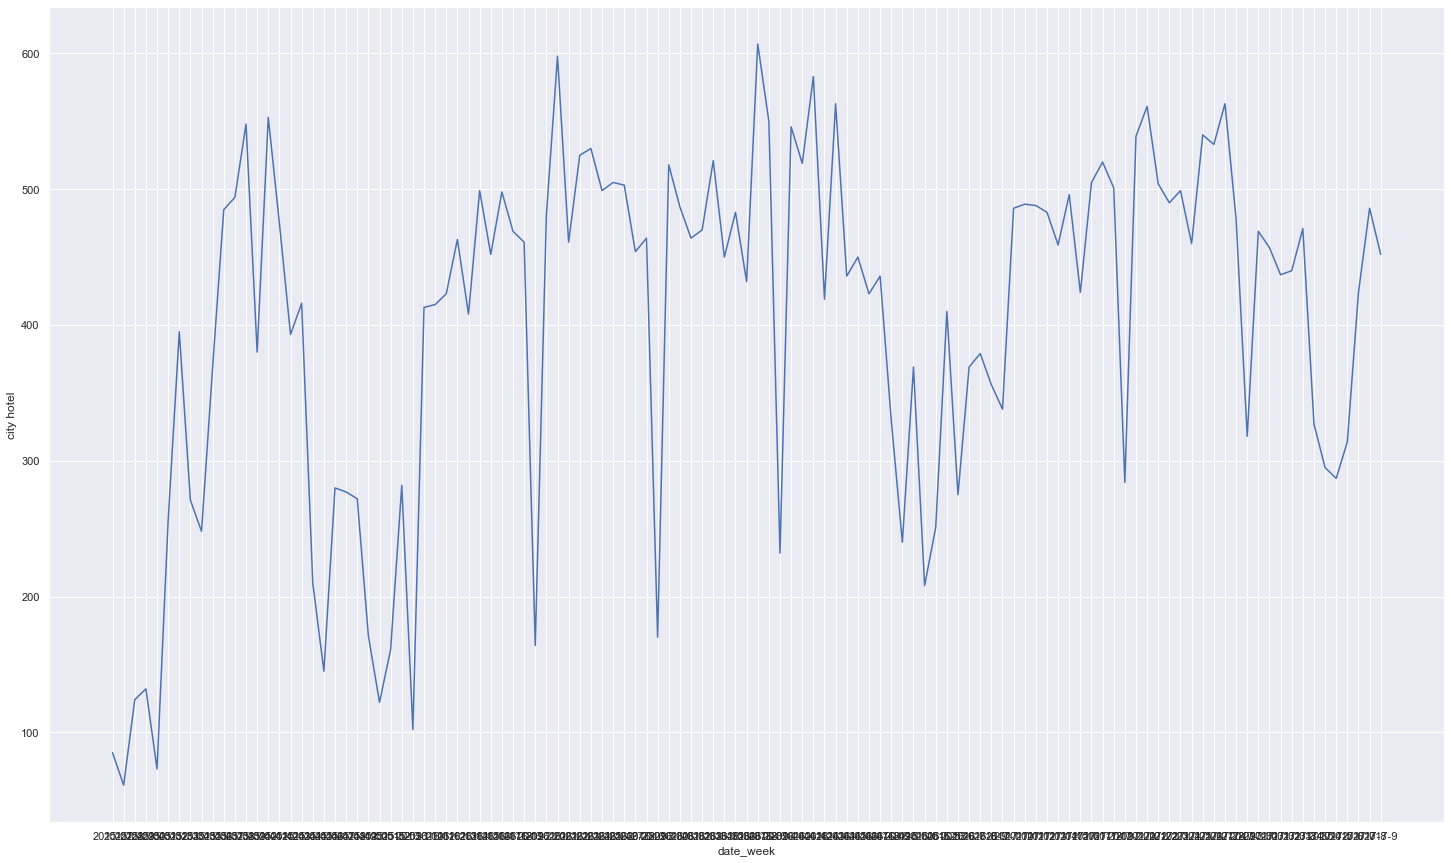

In [31]:
# booking trend: city hotel
sns.lineplot(data=city2,
            x='date_week',
            y='city hotel')
sns.set(rc={'figure.figsize':(25,15)})

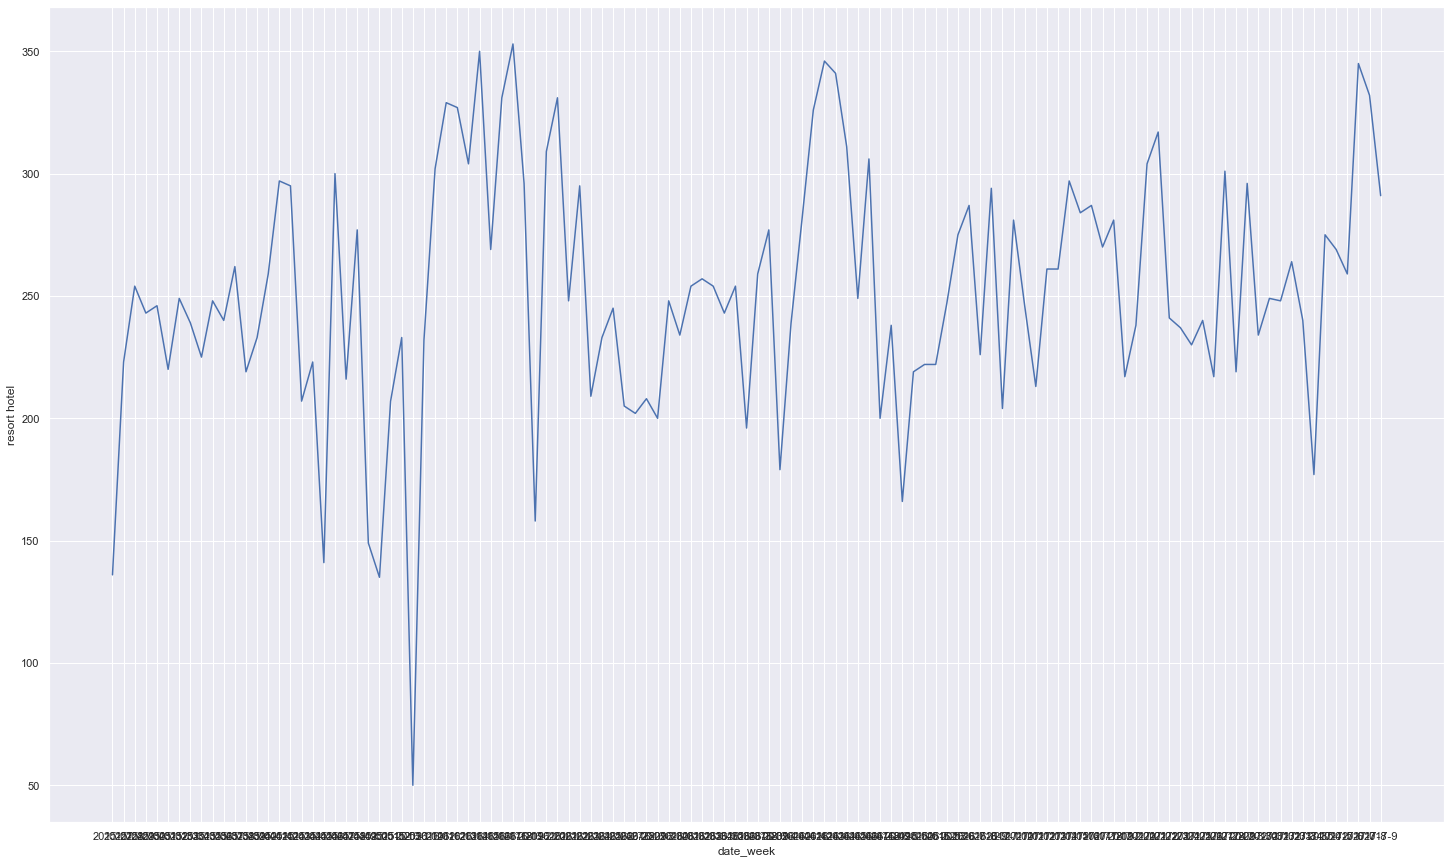

In [32]:
# booking trend: city hotel
sns.lineplot(data=resort2,
            x='date_week',
            y='resort hotel')
sns.set(rc={'figure.figsize':(25,15)})

In [33]:
bookings.to_csv('booking_count_date.csv', index=False)
bookings2.to_csv('booking_count_week.csv', index=False)

Cancellation data

In [34]:
df2 = df.sort_values(['year','week'],ascending=True)
df2['year_week'] = df2['year'].map(str)+df2['week'].map(str)
df2 = pd.DataFrame(df2,columns=['year_week','is_canceled'])
df2 = pd.DataFrame(df2)
df2

,year_week,is_canceled
0,201527,0
1,201527,0
2,201527,0
3,201527,0
4,201527,0
...,...,...
119385,201735,0
119386,201735,0
119387,201735,0
119388,201735,0


In [35]:
df3 = df2.groupby('year_week').agg(sum)
df3.sort_values(['year_week'],ascending=True)
cancellation=df3['is_canceled']
df3

,is_canceled
year_week,
201527,138
201528,201
201529,315
201530,395
201531,260
...,...
20175,262
20176,239
20177,391


In [36]:
df3.to_csv('cancellation.csv', index=False)

Weekly Averge Rate (2016)

In [127]:
df4 = df[df['year'] == 2016]
df4 = df4.sort_values(['year','week'],ascending=True)
df4['year_week'] = df4['year'].map(str)+df4['week'].map(str)
df4 = pd.DataFrame(df4,columns=['week','year_week','adr'])
df4 = df4.groupby('year_week').agg('mean')
df4 = df4.sort_values(['week'],ascending=True)
#df4 = pd.DataFrame(df4,columns=['year_week','adr'])

df4 = df4['adr']
df4

year_week
20161      85.633392
20162      60.062620
20163      58.301336
20164      65.202845
20165      64.471986
20166      65.309641
20167      71.133920
20168      72.520846
20169      70.196456
201610     70.807770
201611     69.099255
201612     71.280286
201613     95.973005
201614     81.495633
201615     82.219402
201616     91.935162
201617     89.360411
201618     91.676228
201619     93.697458
201620     93.903270
201621     93.908809
201622    104.006075
201623    101.424017
201624    109.309036
201625    111.012200
201626    100.302436
201627    109.167345
201628    118.436085
201629    125.843756
201630    128.085344
201631    131.699796
201632    142.054131
201633    147.470945
201634    150.494280
201635    139.155235
201636    122.089401
201637    117.876691
201638    117.192690
201639    113.788160
201640    108.252688
201641    101.550031
201642     98.392777
201643     93.016493
201644     88.885853
201645     84.850494
201646     92.868413
201647     73.669690
201

In [129]:
df4.to_csv('weekly_adr.csv', index=True)

Weekly total booking demand (number of rooms sold) 2016

In [121]:
df5 = df[df['year'] == 2016]
df5 = df5.sort_values(['year','week'],ascending=True)
df5['year_week'] = df5['year'].map(str)+df5['week'].map(str)
df5 = pd.DataFrame(df5,columns=['week','year_week','is_canceled'])
df5['is_not_canceled'] = np.where(df5['is_canceled']==0, 1, 0)
df5 = pd.DataFrame(df5,columns=['week','year_week','is_not_canceled'])
df5 = df5.groupby('week').agg('sum')
df5 = df5.sort_values(['week'],ascending=True)

#df4 = df4['adr']

df5

,is_not_canceled
week,
1,152
2,322
3,370
4,411
5,406
6,550
7,656
8,605
9,650


In [126]:
df5.to_csv('weekly_booking.csv', index=True)